In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [5]:
# Conjunto A
mean = [3, 3]
cov = [[1, 0], [0, 1]]
a = np.random.multivariate_normal(mean, cov, 500).T

# Conjunto B
mean = [-3, -3]
cov = [[2, 0], [0, 5]]
b = np.random.multivariate_normal(mean, cov, 500).T

# Combinação dos dois conjuntos
c = np.concatenate((a, b), axis=1)
c = c.T
np.random.shuffle(c)
c = c.T

# Separação em coordenadas x e y
x = c[0]
y = c[1]

with open("pontos.txt", "w") as f:
    f.write("X\tY\n")  # cabeçalho opcional
    for i in range(c.shape[1]):
        f.write(f"{c[0,i]:.4f} , {c[1,i]:.4f}\n")

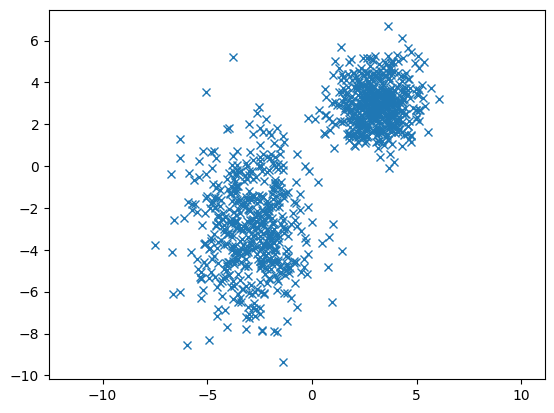

In [4]:
plt.plot( x ,y,"x")
plt.axis("equal" )
plt.show()

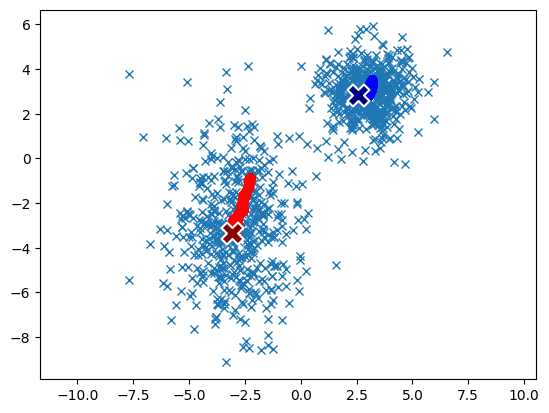

-3.0569354151583896 -3.3433121302124578
2.552756011673667 2.840063514037022


In [ ]:
k1_rand = random.randint(0, 999)
k2_rand = random.randint(0, 999)

# Gerar dois centroides aleatórios
k1 = [c[0][k1_rand], c[1][k1_rand]]
k2 = [c[0][k2_rand], c[1][k2_rand]]
alfa=10e-5
#para guardar a evolução dos centroides
k1_historic = []
k2_historic = []
for epoca in range(10):#10 epocas
    for i in range(len(c[0])):
        
        dist1 = np.sqrt(pow(c[0][i] - k1[0], 2) + pow(c[1][i] - k1[1], 2))
        dist2 = np.sqrt(pow(c[0][i] - k2[0], 2) + pow(c[1][i] - k2[1], 2))

        if dist1 < dist2:
            k1[0] = (1-alfa)*k1[0]+alfa*c[0][i]
            k1[1] = (1-alfa)*k1[1]+alfa*c[1][i]
        else:
            k2[0] = (1-alfa)*k2[0]+alfa*c[0][i]
            k2[1] = (1-alfa)*k2[1]+alfa*c[1][i]
    
    k1_historic.append(k1.copy())
    k2_historic.append(k2.copy())
    #print(f'Época {epoca+1}:')
    #print(f'  k1 = {k1}')
    #print(f'  k2 = {k2}')

x = c[0]
y = c[1]
plt.plot( x ,y,"x")
plt.axis("equal" )

k1_historic = np.array(k1_historic)
k2_historic = np.array(k2_historic)

# Trajetória dos centroides
plt.plot(k1_historic[:, 0], k1_historic[:, 1], 'r-o', label='Trajetória k1')
plt.plot(k2_historic[:, 0], k2_historic[:, 1], 'b-o', label='Trajetória k2')
plt.scatter(k1_historic[-1, 0], k1_historic[-1, 1],
            color='darkred', marker='X', s=250, edgecolor='white',
            linewidth=1.5, label='k1 final', zorder=5)
plt.scatter(k2_historic[-1, 0], k2_historic[-1, 1],
            color='navy', marker='X', s=250, edgecolor='white',
            linewidth=1.5, label='k2 final', zorder=5)
plt.show()
print(k1_historic[-1, 0], k1_historic[-1, 1])
print(k2_historic[-1, 0], k2_historic[-1, 1])



3. Ao alterar o valor de α e o número de épocas, nota-se que ambos influenciam diretamente na forma como os centroides se movem.
Quando α é maior o deslocamento dos centroides é bastante mais rapido. Já com valores de α muito pequenos, o movimento é mais lento e gradual, exigindo mais épocas até atingir a convergência.
Um numero de epocas pequeno, isto é, com poucas iterações, deixam os centroides "instaveis" no sentido em que nao tiveram tempo suficiente para fazer uma boa convergencia. Com mais épocas, acabam por se aproximar dos centros reais dos grupos de pontos.
No final, observa-se que os valores de r₁ e r₂ convergem para as médias dos conjuntos usados, mostrando que o algoritmo consegue identificar corretamente o centro de cada distribuição.

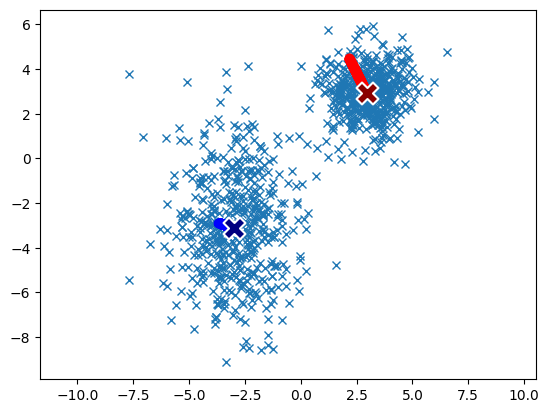

Coordenadas finais:
k1 = [2.94739737 2.94240535]
k2 = [-3.00233916 -3.09912413]


In [10]:
alfa2 = 10e-3
num_epocas = 1000
n = len(c[0])

# Inicializar centroides aleatórios
k1_rand = random.randint(0, 999)
k2_rand = random.randint(0, 999)
k1 = [c[0][k1_rand], c[1][k1_rand]]
k2 = [c[0][k2_rand], c[1][k2_rand]]

# Histórico
k1_historic = []
k2_historic = []


for epoca in range(num_epocas):
    d1 = [0, 0]  
    d2 = [0, 0] 

    for i in range(n):
       
        dist1 = np.sqrt(pow(c[0][i] - k1[0], 2) + pow(c[1][i] - k1[1], 2))
        dist2 = np.sqrt(pow(c[0][i] - k2[0], 2) + pow(c[1][i] - k2[1], 2))
        #para termos os efeitos cumulativos fazemos a diferença entre o ponto e o centroide mais proximo para no fim da epoca atualizarmos o centroide  
        if dist1 < dist2:
            d1[0] += (c[0][i] - k1[0])
            d1[1] += (c[1][i] - k1[1])
        else:
            d2[0] += (c[0][i] - k2[0])
            d2[1] += (c[1][i] - k2[1])

    # Atualiza os centroides apenas no fim da época
    k1[0] += (alfa2 / n) * d1[0]
    k1[1] += (alfa2 / n) * d1[1]
    k2[0] += (alfa2 / n) * d2[0]
    k2[1] += (alfa2 / n) * d2[1]

   
    k1_historic.append(k1.copy())
    k2_historic.append(k2.copy())

# Plot final
x = c[0]
y = c[1]
plt.plot(x, y, "x")
plt.axis("equal")

k1_historic = np.array(k1_historic)
k2_historic = np.array(k2_historic)

# Trajetórias (um ponto por época)
plt.plot(k1_historic[:, 0], k1_historic[:, 1], 'r-o', label='k1')
plt.plot(k2_historic[:, 0], k2_historic[:, 1], 'b-o', label='k2')

# Pontos finais
plt.scatter(k1_historic[-1, 0], k1_historic[-1, 1],
            color='darkred', marker='X', s=250, edgecolor='white',
            linewidth=1.5, label='k1 final', zorder=5)
plt.scatter(k2_historic[-1, 0], k2_historic[-1, 1],
            color='navy', marker='X', s=250, edgecolor='white',
            linewidth=1.5, label='k2 final', zorder=5)

plt.show()

print("Coordenadas finais:")
print("k1 =", k1_historic[-1])
print("k2 =", k2_historic[-1])

Observa-se que, neste método, os representantes (r₁ e r₂) movem-se de forma mais gradual e com menos variações bruscas do que no exercício 1.
O percurso até aos centros dos grupos parece mais direto, no entanto sao necessarias mais epocas para estabilizar (utilizando os mesmo parametro na simulaçao)

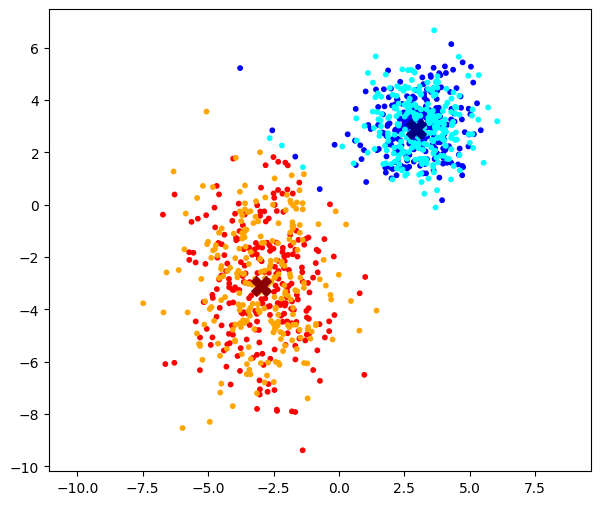

In [7]:
colors = []  # lista de cores

for i in range(len(c[0])):
    dist1 = np.sqrt(pow(c[0][i] - k1[0], 2) + pow(c[1][i] - k1[1], 2))
    dist2 = np.sqrt(pow(c[0][i] - k2[0], 2) + pow(c[1][i] - k2[1], 2))

    #Primeiros 500 pontos conjunto A 
    if i < 500:
        etiqueta = 1
    else:
        etiqueta = 2

    # Decidir a cor com base na proximidade e na etiqueta original
    if dist1 < dist2 and etiqueta == 1:
        colors.append("red")       # pontos de A próximos de r1
    elif dist1 < dist2 and etiqueta == 2:
        colors.append("orange")    # pontos de B próximos de r1
    elif dist2 <= dist1 and etiqueta == 1:
        colors.append("blue")      # pontos de A próximos de r2
    else:
        colors.append("cyan")      # pontos de B próximos de r2

# Plot final
plt.figure(figsize=(7,6))
plt.scatter(c[0], c[1], c=colors, s=10)
plt.scatter(k1[0], k1[1], color='darkred', marker='X', s=200, label='r1')
plt.scatter(k2[0], k2[1], color='navy', marker='X', s=200, label='r2')
plt.axis('equal')
plt.show()


estava a dar errado porque os dados estavam a ser shuffled e estava a dar estes resultados muito estranhos

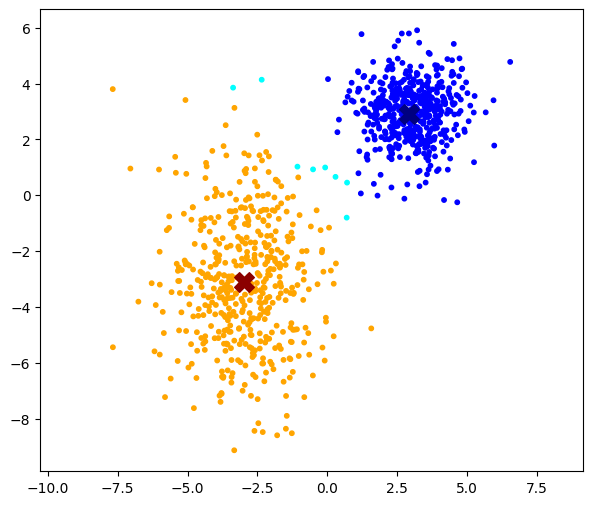

In [8]:
# Conjunto A
mean = [3, 3]
cov = [[1, 0], [0, 1]]
a = np.random.multivariate_normal(mean, cov, 500).T

# Conjunto B
mean = [-3, -3]
cov = [[2, 0], [0, 5]]
b = np.random.multivariate_normal(mean, cov, 500).T

# Combinação dos dois conjuntos
c = np.concatenate((a, b), axis=1)
c = c.T
#np.random.shuffle(c)
c = c.T
colors = []  # lista de cores

for i in range(len(c[0])):
    dist1 = np.sqrt(pow(c[0][i] - k1[0], 2) + pow(c[1][i] - k1[1], 2))
    dist2 = np.sqrt(pow(c[0][i] - k2[0], 2) + pow(c[1][i] - k2[1], 2))

    #Primeiros 500 pontos conjunto A 
    if i < 500:
        etiqueta = 1
    else:
        etiqueta = 2

    # Decidir a cor com base na proximidade e na etiqueta original
    if dist1 < dist2 and etiqueta == 1:
        colors.append("red")       # pontos de A próximos de r1
    elif dist1 < dist2 and etiqueta == 2:
        colors.append("orange")    # pontos de B próximos de r1
    elif dist2 <= dist1 and etiqueta == 1:
        colors.append("blue")      # pontos de A próximos de r2
    else:
        colors.append("cyan")      # pontos de B próximos de r2

# Plot final
plt.figure(figsize=(7,6))
plt.scatter(c[0], c[1], c=colors, s=10)
plt.scatter(k1[0], k1[1], color='darkred', marker='X', s=200, label='r1')
plt.scatter(k2[0], k2[1], color='navy', marker='X', s=200, label='r2')
plt.axis('equal')
plt.show()

Assim os resultados fazem muito mais sentido apenas dois pontos foram mal classificados!

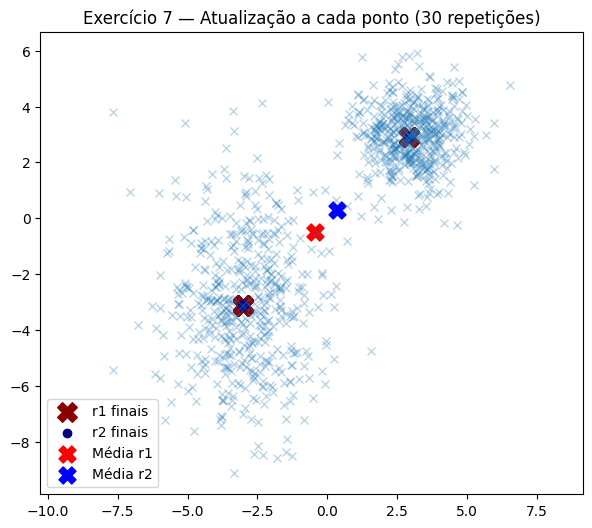

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import random

alfa = 1e-3
num_epocas = 20
n = len(c[0])

# posições finais de r1 e r2 após 30 repetições
r1_finais = []
r2_finais = []

for repeticao in range(30):
    # Inicializar centroides aleatórios
    k1_rand = random.randint(0, 999)
    k2_rand = random.randint(0, 999)
    k1 = [c[0][k1_rand], c[1][k1_rand]]
    k2 = [c[0][k2_rand], c[1][k2_rand]]

    # Atualização "online" (a cada ponto)
    for epoca in range(num_epocas):
        for i in range(n):
            dist1 = np.sqrt(pow(c[0][i] - k1[0], 2) + pow(c[1][i] - k1[1], 2))
            dist2 = np.sqrt(pow(c[0][i] - k2[0], 2) + pow(c[1][i] - k2[1], 2))

            if dist1 < dist2:
                k1[0] = (1 - alfa) * k1[0] + alfa * c[0][i]
                k1[1] = (1 - alfa) * k1[1] + alfa * c[1][i]
            else:
                k2[0] = (1 - alfa) * k2[0] + alfa * c[0][i]
                k2[1] = (1 - alfa) * k2[1] + alfa * c[1][i]

    # Guardar as posições finais
    r1_finais.append(k1.copy())
    r2_finais.append(k2.copy())

# Converter para arrays para facilitar o plot
r1_finais = np.array(r1_finais)
r2_finais = np.array(r2_finais)

# ====== Gráfico ======
plt.figure(figsize=(7,6))
plt.plot(c[0], c[1], "x", alpha=0.3)
plt.scatter(r1_finais[:,0], r1_finais[:,1], color='darkred', marker='X', label='r1 finais', s=200)
plt.scatter(r2_finais[:,0], r2_finais[:,1], color='navy', marker='o', label='r2 finais')
plt.scatter(np.mean(r1_finais[:,0]), np.mean(r1_finais[:,1]), color='red', marker='X', s=150, label='Média r1')
plt.scatter(np.mean(r2_finais[:,0]), np.mean(r2_finais[:,1]), color='blue', marker='X', s=150, label='Média r2')
plt.axis("equal")
plt.legend()
plt.title("Exercício 7 — Atualização a cada ponto (30 repetições)")
plt.show()


Podemos obervar no grafico acima que com um alfa e um numero de epocas realativamente baixo para termos uma boa convergencia temos os centroides finais muito dispersos como ja foi analisado no exercicio 1. Aumentando estes parametros para termos uma melhor convergencia observamos o seguinte plot presente na foto do ponto 7(30 repetiçoes).
Foi ainda realizado um teste com 1000 repetiçoes e como seria de esperar a media dos centroides ficou muito perto uma da outra, a tendencia para infinito seria que eles ficassem um em cima do outro ja que probabilisticamente 50% das vezes o r1 pode ir para um cluster ou para o outro!